<a href="https://colab.research.google.com/github/Leos1999/Clustering_Network_Logs/blob/master/Clustering_NetworkRequests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kmodes

In [68]:
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

In [69]:
def datamaker(df):
  date = []
  method = []
  for row in df.values:
    if row[1][0] == '[':
      date.append(row[1][1:12])
      row[1] = row[1].split("[")[1]
      method.append(row[2].split()[0])
      row[2] = row[2].split()[1]
    else:
      date.append('Nil')
      method.append('Nil')
      row[1] = "Nil"
      row[2] = "Nil"
  df['Date'] = date
  df['Method'] = method
  print(df.shape)
  print(len(date))
  print(len(method))
  return df

In [70]:
data = pd.read_csv("/content/weblog.csv")
# data.head() 

In [71]:
df = datamaker(data)
df.head(20)

(16007, 6)
16007
16007


,IP,Time,URL,Staus,Date,Method
0,10.128.2.1,29/Nov/2017:06:58:55,/login.php,200,29/Nov/2017,GET
1,10.128.2.1,29/Nov/2017:06:59:02,/process.php,302,29/Nov/2017,POST
2,10.128.2.1,29/Nov/2017:06:59:03,/home.php,200,29/Nov/2017,GET
3,10.131.2.1,29/Nov/2017:06:59:04,/js/vendor/moment.min.js,200,29/Nov/2017,GET
4,10.130.2.1,29/Nov/2017:06:59:06,/bootstrap-3.3.7/js/bootstrap.js,200,29/Nov/2017,GET
5,10.130.2.1,29/Nov/2017:06:59:19,/profile.php?user=bala,200,29/Nov/2017,GET
6,10.128.2.1,29/Nov/2017:06:59:19,/js/jquery.min.js,200,29/Nov/2017,GET
7,10.131.2.1,29/Nov/2017:06:59:19,/js/chart.min.js,200,29/Nov/2017,GET
8,10.131.2.1,29/Nov/2017:06:59:30,/edit.php?name=bala,200,29/Nov/2017,GET
9,10.131.2.1,29/Nov/2017:06:59:37,/logout.php,302,29/Nov/2017,GET


In [72]:
array = df.values

In [76]:
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=2)
    kmode.fit_predict(array)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 56749.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 51083.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1226, cost: 47839.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 605, cost: 44475.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 607, cost: 43489.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 599, cost: 42655.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 280, cost: 42242.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1,

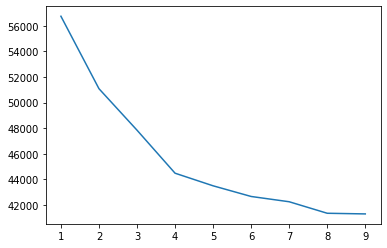

In [78]:
y = np.array([i for i in range(1,10)])
plt.plot(y,cost)

In [79]:
# kproto = KPrototypes(n_clusters=3, verbose=2,max_iter=25)
# clusters = kproto.fit_predict(array, categorical=[0,1,2,3,4,5])

km_cao = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=2)
clusters = km_cao.fit_predict(array)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 605, cost: 44475.0


In [80]:
print(km_cao.cluster_centroids_)

[['10.128.2.1' 'Nil' '/login.php' '200' '29/Jan/2018' 'GET']
 ['10.131.0.1' '30/Nov/2017:12:02:41' '/home.php' '200' '30/Nov/2017'
  'GET']
 ['10.130.2.1' '16/Nov/2017:15:51:03' '/js/vendor/modernizr-2.8.3.min.js'
  '200' '29/Jan/2018' 'GET']
 ['10.130.2.1' '29/Jan/2018:20:32:33' '/home.php' '302' '29/Jan/2018'
  'GET']]


In [81]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [82]:
df['cluster']=cluster_dict

In [83]:
df.head()

,IP,Time,URL,Staus,Date,Method,cluster
0,10.128.2.1,29/Nov/2017:06:58:55,/login.php,200,29/Nov/2017,GET,0
1,10.128.2.1,29/Nov/2017:06:59:02,/process.php,302,29/Nov/2017,POST,0
2,10.128.2.1,29/Nov/2017:06:59:03,/home.php,200,29/Nov/2017,GET,0
3,10.131.2.1,29/Nov/2017:06:59:04,/js/vendor/moment.min.js,200,29/Nov/2017,GET,0
4,10.130.2.1,29/Nov/2017:06:59:06,/bootstrap-3.3.7/js/bootstrap.js,200,29/Nov/2017,GET,2


In [84]:
df[df['cluster']== 0].head(20)

,IP,Time,URL,Staus,Date,Method,cluster
0,10.128.2.1,29/Nov/2017:06:58:55,/login.php,200,29/Nov/2017,GET,0
1,10.128.2.1,29/Nov/2017:06:59:02,/process.php,302,29/Nov/2017,POST,0
2,10.128.2.1,29/Nov/2017:06:59:03,/home.php,200,29/Nov/2017,GET,0
3,10.131.2.1,29/Nov/2017:06:59:04,/js/vendor/moment.min.js,200,29/Nov/2017,GET,0
6,10.128.2.1,29/Nov/2017:06:59:19,/js/jquery.min.js,200,29/Nov/2017,GET,0
7,10.131.2.1,29/Nov/2017:06:59:19,/js/chart.min.js,200,29/Nov/2017,GET,0
8,10.131.2.1,29/Nov/2017:06:59:30,/edit.php?name=bala,200,29/Nov/2017,GET,0
10,10.131.2.1,29/Nov/2017:06:59:37,/login.php,200,29/Nov/2017,GET,0
11,10.130.2.1,29/Nov/2017:07:00:19,/login.php,200,29/Nov/2017,GET,0
12,10.130.2.1,29/Nov/2017:07:00:21,/login.php,200,29/Nov/2017,GET,0


In [85]:
df[df['cluster']== 1].head(10)

,IP,Time,URL,Staus,Date,Method,cluster
16,10.131.0.1,29/Nov/2017:13:38:04,/home.php,200,29/Nov/2017,GET,1
17,10.131.0.1,29/Nov/2017:13:38:07,/contestproblem.php?name=RUET%20OJ%20Server%20...,200,29/Nov/2017,GET,1
22,10.131.0.1,29/Nov/2017:13:38:20,/css/normalize.css,200,29/Nov/2017,GET,1
24,10.131.0.1,29/Nov/2017:13:38:20,/js/vendor/modernizr-2.8.3.min.js,200,29/Nov/2017,GET,1
26,10.131.0.1,29/Nov/2017:13:38:21,/js/vendor/jquery-1.12.0.min.js,200,29/Nov/2017,GET,1
36,10.131.2.1,29/Nov/2017:13:47:16,/home.php,200,29/Nov/2017,GET,1
47,10.131.2.1,29/Nov/2017:13:51:44,/home.php,200,29/Nov/2017,GET,1
62,10.131.0.1,29/Nov/2017:14:31:33,/,200,29/Nov/2017,GET,1
66,10.131.0.1,29/Nov/2017:14:33:22,/css/normalize.css,304,29/Nov/2017,GET,1
68,10.131.0.1,29/Nov/2017:14:33:22,/css/style.css,304,29/Nov/2017,GET,1


In [86]:
df[df['cluster']==2].head(10)

,IP,Time,URL,Staus,Date,Method,cluster
4,10.130.2.1,29/Nov/2017:06:59:06,/bootstrap-3.3.7/js/bootstrap.js,200,29/Nov/2017,GET,2
5,10.130.2.1,29/Nov/2017:06:59:19,/profile.php?user=bala,200,29/Nov/2017,GET,2
38,10.130.2.1,29/Nov/2017:13:47:20,/countdown.php?name=RUET%20OJ%20Server%20Testi...,200,29/Nov/2017,GET,2
74,10.130.2.1,29/Nov/2017:14:38:07,/compiler.php,200,29/Nov/2017,GET,2
76,10.130.2.1,29/Nov/2017:14:38:09,/bootstrap-3.3.7/js/bootstrap.js,304,29/Nov/2017,GET,2
77,10.130.2.1,29/Nov/2017:14:38:13,/compiler.php,200,29/Nov/2017,GET,2
98,10.130.2.1,29/Nov/2017:15:01:04,/contest.php,200,29/Nov/2017,GET,2
101,10.130.2.1,29/Nov/2017:15:04:11,/countdown.php?name=RUET%20OJ%20Server%20Testi...,200,29/Nov/2017,GET,2
102,10.130.2.1,29/Nov/2017:15:04:31,/contest.php,200,29/Nov/2017,GET,2
104,10.130.2.1,29/Nov/2017:15:04:35,/countdown.php?name=RUET%20OJ%20Server%20Testi...,200,29/Nov/2017,GET,2


In [87]:
df[df['cluster']==3].head(10)

,IP,Time,URL,Staus,Date,Method,cluster
9,10.131.2.1,29/Nov/2017:06:59:37,/logout.php,302,29/Nov/2017,GET,3
13,10.130.2.1,29/Nov/2017:13:31:27,/,302,29/Nov/2017,GET,3
15,10.129.2.1,29/Nov/2017:13:38:03,/process.php,302,29/Nov/2017,POST,3
18,10.130.2.1,29/Nov/2017:13:38:19,/,302,29/Nov/2017,GET,3
31,10.131.2.1,29/Nov/2017:13:46:53,/logout.php,302,29/Nov/2017,GET,3
33,10.131.2.1,29/Nov/2017:13:47:04,/process.php,302,29/Nov/2017,POST,3
35,10.131.2.1,29/Nov/2017:13:47:16,/process.php,302,29/Nov/2017,POST,3
37,10.131.2.1,29/Nov/2017:13:47:19,/contestproblem.php?name=RUET%20OJ%20Server%20...,302,29/Nov/2017,GET,3
39,10.129.2.1,29/Nov/2017:13:49:25,/details.php?id=44,302,29/Nov/2017,GET,3
44,10.131.2.1,29/Nov/2017:13:51:40,/logout.php,302,29/Nov/2017,GET,3
